In [ ]:
import pandas as pd
import openpyxl
import xlsxwriter
import numpy as np
import pdb
from dateutil.relativedelta import *
import glob
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
balance_sheet_df  = pd.DataFrame()
profit_loss_df = pd.DataFrame()
cash_flow_df = pd.DataFrame()

company_name = "Kiri Indus.xlsx"
xl = pd.ExcelFile('../../finance_vicky/files/input/company_details/'+company_name)
if 'Balance Sheet' in xl.sheet_names:
    balance_sheet_df = xl.parse('Balance Sheet', skiprows=2)
if 'Profit & Loss' in xl.sheet_names:
    profit_loss_df = xl.parse('Profit & Loss', skiprows=2)

In [257]:
#balance_sheet_df.set_index('Narration', inplace=True)
#balance_sheet_df.columns = pd.to_datetime(balance_sheet_df.columns)
balance_sheet_df.dropna(inplace=True)
print(balance_sheet_df.index.values)
t_balance_sheet_df = balance_sheet_df.T
t_balance_sheet_df.index.name = 'Date'
t_balance_sheet_df.columns.name = 'Narration'
t_balance_sheet_df.index = t_balance_sheet_df.index.map(lambda x: x.year)
t_balance_sheet_df['% Increase in Equity'] = t_balance_sheet_df['Equity Share Capital'].pct_change()*100
t_balance_sheet_df['% Increase in Liability'] = t_balance_sheet_df['Total Liability'].pct_change()*100
t_balance_sheet_df['% Increase in ROE'] = t_balance_sheet_df['Return on Equity'].pct_change()
t_balance_sheet_df['% Increase in Borrowing'] = t_balance_sheet_df['Borrowings'].pct_change()



['Equity Share Capital' 'Reserves' 'Borrowings' 'Other Liabilities'
 'Total Liability' 'Net Block' 'Capital Work in Progress' 'Investments'
 'Other Assets' 'Total Assets' 'Working Capital' 'Debtors' 'Inventory'
 'Debtor Days' 'Inventory Turnover' 'Return on Equity'
 'Return on Capital Emp']


In [259]:
#profit_loss_df.set_index('Narration', inplace=True)
#profit_loss_df.columns = pd.to_datetime(profit_loss_df.columns)
t_profit_loss_df = profit_loss_df.T
t_profit_loss_df.columns.name = 'Narration'
t_profit_loss_df.index.name = 'Date'
t_profit_loss_df['% Sales'] = t_profit_loss_df['Sales'].pct_change()*100
t_profit_loss_df['% Operating Profit'] = t_profit_loss_df['Operating Profit'].pct_change()*100
t_profit_loss_df.index = t_profit_loss_df.index.map(lambda x: x.year)
t_profit_loss_df['% Increase in PAT' ] = t_profit_loss_df['Net profit'].pct_change()

In [ ]:
sn.set()



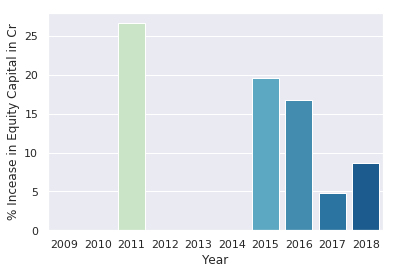

In [306]:
fig_shares = sn.barplot(data=t_balance_sheet_df, x=t_balance_sheet_df.index, y='% Increase in Equity', palette = sn.color_palette("GnBu", 10))
plt.xlabel('Year')
plt.ylabel('% Incease in Equity Capital in Cr')
plt.show(fig_liability)

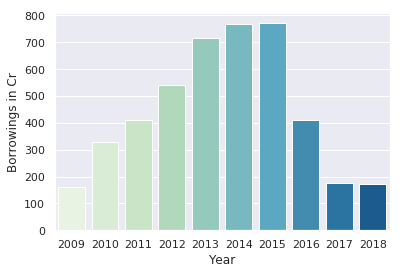

In [305]:

fig_liability = sn.barplot(data=t_balance_sheet_df, x=t_balance_sheet_df.index, y='Borrowings', palette = sn.color_palette("GnBu", 10))
plt.xlabel('Year')
plt.ylabel('Borrowings in Cr')
plt.show(fig_liability)

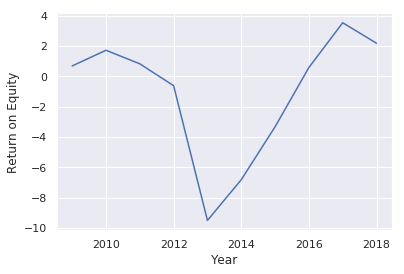

Date
2009    0.680709
2010    1.714640
2011    0.820894
2012   -0.622395
2013   -9.500699
2014   -6.816700
2015   -3.328818
2016    0.578481
2017    3.527914
2018    2.177163
Name: Return on Equity, dtype: float64


In [243]:
t_balance_sheet_df['Return on Equity'] = t_balance_sheet_df['Return on Equity']
fig_roe = sn.lineplot(data=t_balance_sheet_df, x=t_balance_sheet_df.index, y='Return on Equity')
plt.xlabel('Year')
plt.ylabel('Return on Equity')
plt.show(fig_roe)

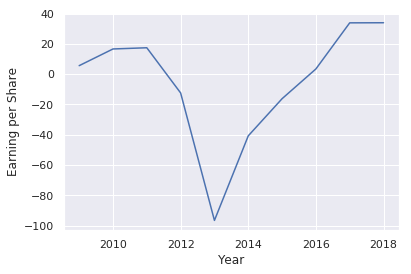

In [253]:
fig_eps = sn.lineplot(data=t_profit_loss_df, x=t_profit_loss_df.index, y='EPS')
plt.xlabel('Year')
plt.ylabel('Earning per Share')
plt.show(fig_eps)

In [261]:
melted_pl_df = pd.melt(t_profit_loss_df.reset_index(), id_vars=t_profit_loss_df.index.name, value_vars=list(t_profit_loss_df.columns))
melted_df = pd.melt(t_balance_sheet_df.reset_index(), id_vars=t_balance_sheet_df.index.name, value_vars=list(t_balance_sheet_df.columns))
melted_df = pd.concat([melted_df, melted_pl_df])
print(melted_df.head())

   Date             Narration  value
0  2009  Equity Share Capital   15.0
1  2010  Equity Share Capital   15.0
2  2011  Equity Share Capital   19.0
3  2012  Equity Share Capital   19.0
4  2013  Equity Share Capital   19.0


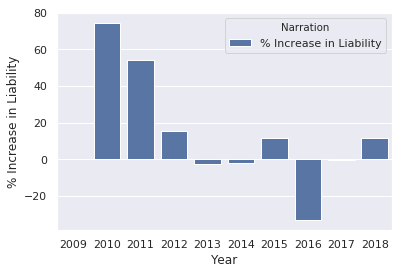

In [231]:
fig_debt_to_equity = sn.barplot(data=melted_df, x='Date', y='value', hue='Narration', hue_order=['% Increase in Liability'])
plt.xlabel('Year')
plt.ylabel('% Increase in Liability')
plt.show(fig_debt_to_equity)

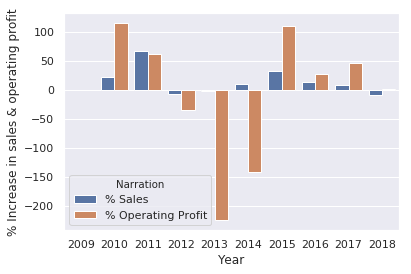

<Figure size 432x288 with 0 Axes>

In [303]:
fig_growth = sn.barplot(data=melted_df, x='Date', y='value', hue='Narration', hue_order=['% Sales','% Operating Profit'])
plt.xlabel('Year')
plt.ylabel('% Increase in sales & operating profit')
plt.show(fig_growth)
plt.savefig("%Increase sales & operating profit.png")

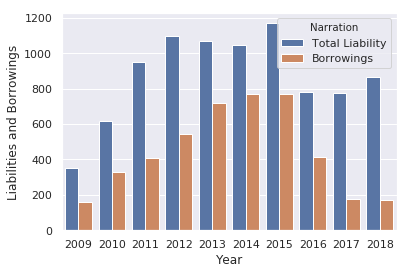

In [304]:
fig_liability_borrowing = sn.barplot(data=melted_df, x='Date', y='value', hue='Narration', hue_order=['Total Liability','Borrowings'])
plt.xlabel('Year')
plt.ylabel('Liabilities and Borrowings')
plt.show(fig_liability_borrowing)
#plt.savefig("%Increase sales & operating profit.png")

            Borrowings  Net profit
Borrowings    1.000000   -0.814079
Net profit   -0.814079    1.000000


/Users/parija/src/sp_data_science/projects/finance_vicky/src/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


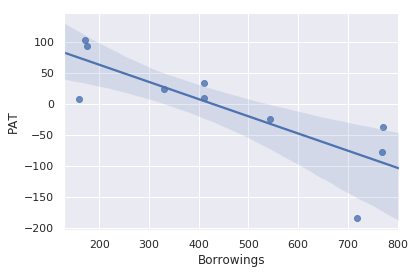

<Figure size 432x288 with 0 Axes>

In [290]:
borrow_pat = pd.concat([balance_sheet_df.loc['Borrowings',:],profit_loss_df.loc['Net profit',:]], axis=1)
print(borrow_pat.corr())
#t_balance_sheet_df.reindex(columns=columns)
#print(t_balance_sheet_df[["Borrowings", "Net profit"]])
fig_borrow_pat = sn.regplot(data= borrow_pat, x='Borrowings', y='Net profit')
plt.xlabel('Borrowings')
plt.ylabel('PAT')

plt.show(fig_borrow_pat)
plt.savefig("%Increase sales & operating profit.png")

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='Date')


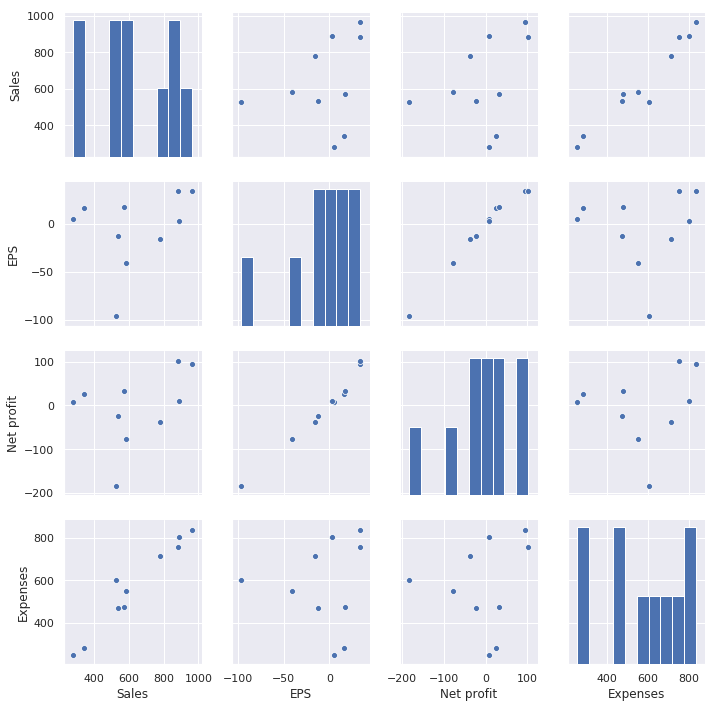

In [301]:
print(t_profit_loss_df.index)
# Pair Plots
balance_sheet_pairplot = sn.pairplot(t_profit_loss_df[['Sales', 'EPS', 'Net profit', 'Expenses']])
plt.show(balance_sheet_pairplot)